# Manual Hyperparameter Tuning a Neural Network

## Introduction
In Challenge 4, we built a simple neural network using Keras. In this challenge, we will manually experiment with hyperarameters.

This notebook contains the same workflow. Step 2 is the section that shows the simple 3-layer neural network from chapter 4. Section three is for you to change the same neural network by adding additional layers, neurons, and changing the number of epochs - then running the plot graph cell to see the results.

NOTE: Be sure to re-run the begining cells before working on Section 3.

## Dataset
The advertising dataset captures the sales revenue generated with respect to advertisement costs across numerous platforms like radio, TV, and newspapers.

### Features:

#### Digital: advertising dollars spent on Internet.
#### TV: advertising dollars spent on TV.
#### Radio: advertising dollars spent on Radio.
#### Newspaper: advertising dollars spent on Newspaper.

### Target (Label):
#### Sales budget

# Step 1: Data Preparation

### Import Libraries

In [15]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense


In [16]:
# Next, you read the dataset into a Pandas dataframe.

url = '/Users/vinayak/Documents/GitHub/ANN/Advertising_2023.csv'
advertising_df= pd.read_csv(url,index_col=0)


In [17]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [18]:
### Get summary of statistics of the data
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [19]:
#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

Let's check for any null values.

In [20]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

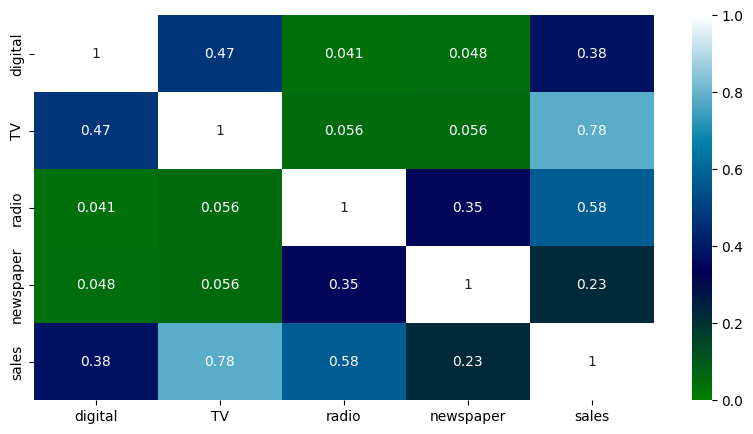

In [21]:
## Plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')


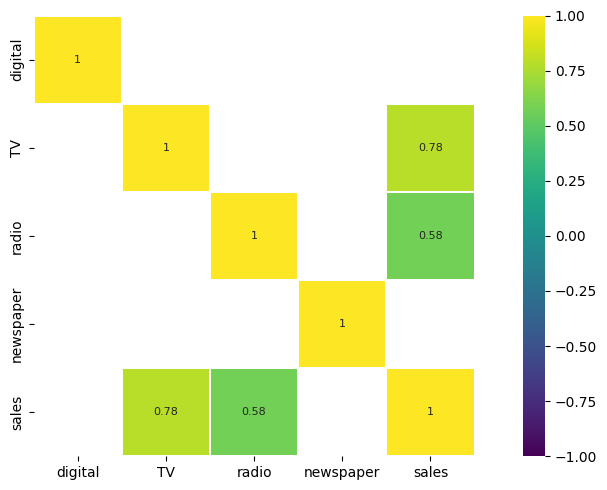

None

In [22]:
#create a correlation matrix
corr = advertising_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

In [23]:
advertising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

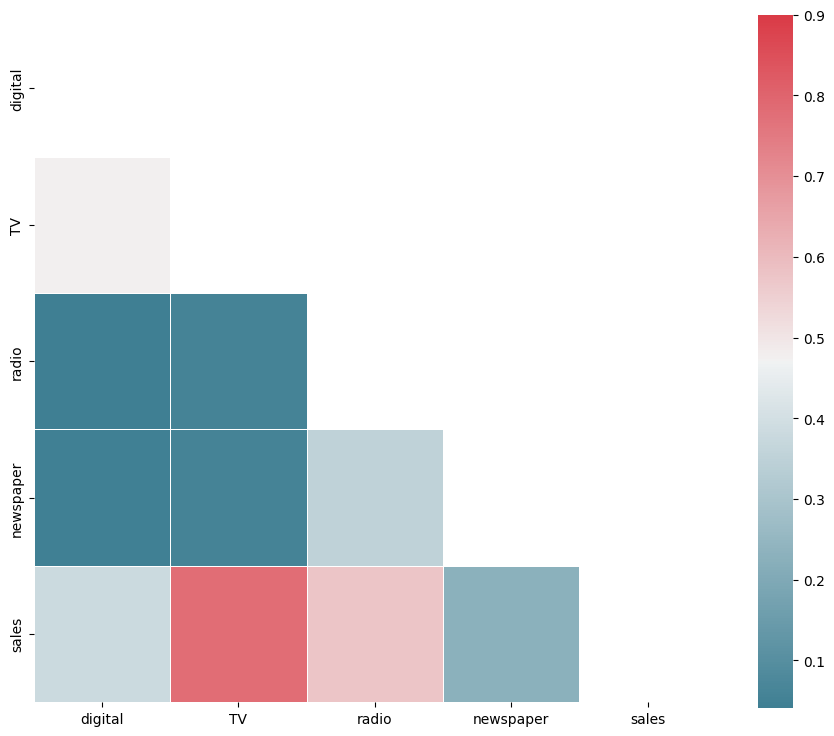

In [24]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(advertising_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(advertising_df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Since Sales is our target variable, we should identify which variable correlates the most with Sales.

As we can see, TV has the highest correlation with Sales.
Let's visualize the relationship of variables using scatterplots.

Rather than plot them separately, an efficient way to view the linear relationsips between variables is to use a "for loop" that plots all of the features at once.

It seems there's no clear linear relationships between the predictors.

At this point, we know that the variable TV will more likely give better prediction of Sales because of the high correlation and linearity of the two.

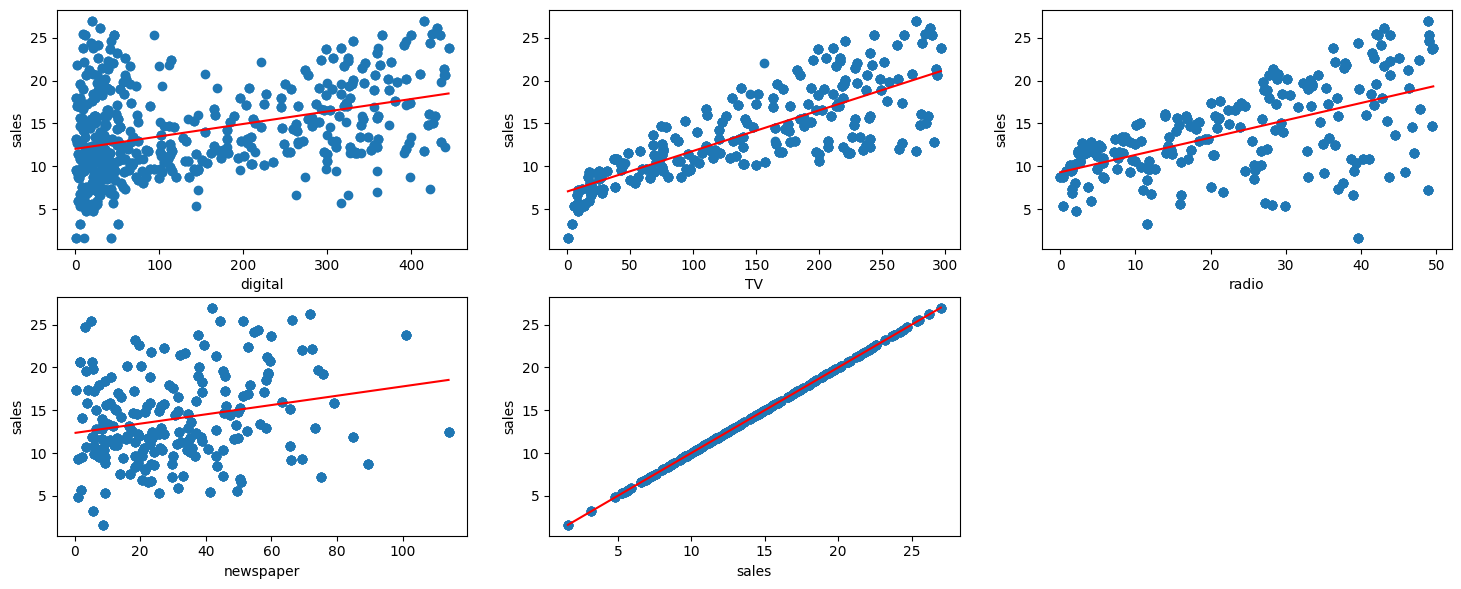

In [25]:
'''=== Show the linear relationship between features  and sales Thus, it provides that how the scattered
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label


Concluding results after observing the Graph
The relation bw TV and Sales is stong and increases in linear fashion
The relation bw Radio and Sales is less stong
The relation bw TV and Sales is weak

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression.

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

#### Data Preprocessing

##### Split: X (features) and y (target)
Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [26]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']



##### Scaling (Normalization)

In [27]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)



##### Train - Test - Split

Now let's split the data into a training and test set.  Note:  Best pracices is to split into three - training, validation, and test set.

By default - It splits the given data into 75-25 ratio


In [28]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [29]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Step 2:  Build Network


#### Build and Train the Network

In [30]:
## Build Model (Building a three layer network - with one hidden layer)
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))                                                  # You don't have to specify input size.Just define the hidden layers
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 32)



Epoch 1/32


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7080.5005 - mse: 7080.5005 - val_loss: 5299.1611 - val_mse: 5299.1611
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4956.4702 - mse: 4956.4702 - val_loss: 3308.0742 - val_mse: 3308.0742
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2985.5239 - mse: 2985.5239 - val_loss: 2311.3857 - val_mse: 2311.3857
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2073.2209 - mse: 2073.2209 - val_loss: 1820.1775 - val_mse: 1820.1775
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1803.3374 - mse: 1803.3374 - val_loss: 1508.3866 - val_mse: 1508.3866
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 1313.5449 - mse: 1313.5449 - val_loss: 1270.4985 - val_mse: 1270.4985
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1171.6116 - mse: 1171.6116 - val_loss: 1071.4614 - val_mse: 1071.4614
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 900.8913 - mse: 900.8913 - val_loss: 905.3580 - v

### Visualization

You can add more 'flavor' to the graph by making it bigger and adding labels and names, as shown below.

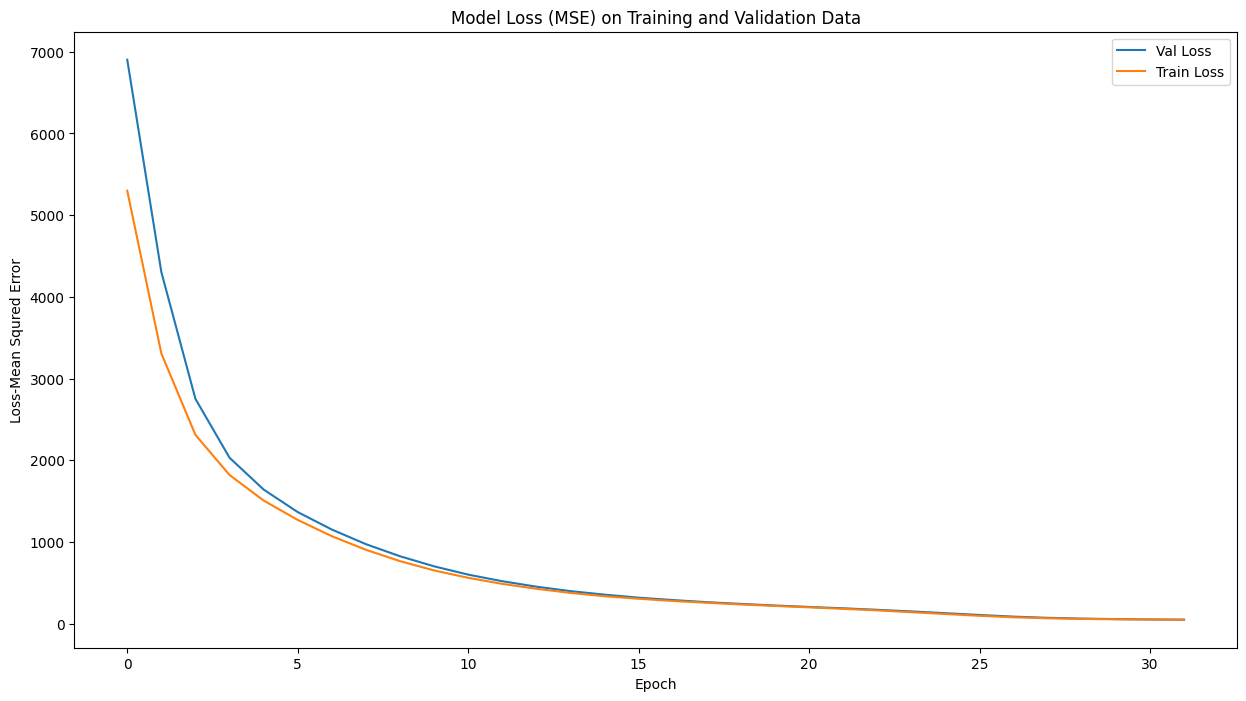

In [31]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()



# Step 3:  Tune the Neural Network Hyperparameters

## CHALLENGE: Manual Hyperparameter Tuning

Play with:
1. Adding additional layers
2. Adding additional neurons
3. Change the number of epochs.

NOTE: After each change, run the cell to plot the graph and review the loss curves.

In [32]:
## Build Model
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 32)

Epoch 1/32


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8278.2354 - mse: 8278.2354 - val_loss: 5092.3608 - val_mse: 5092.3608
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4046.7686 - mse: 4046.7686 - val_loss: 2089.2725 - val_mse: 2089.2725
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1532.5527 - mse: 1532.5527 - val_loss: 800.0718 - val_mse: 800.0718
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 617.7325 - mse: 617.7325 - val_loss: 414.4679 - val_mse: 414.4679
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 410.7361 - mse: 410.7361 - val_loss: 326.1880 - val_mse: 326.1880
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 321.1975 - mse: 321.1975 - val_loss: 296.2504 - val_mse: 296.2504
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 325.6768 - mse: 325.6768 - val_loss: 271.4060 - val_mse: 271.4060
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 284.1592 - mse: 284.1592 - val_loss: 249.7652 - val_mse: 249.7652

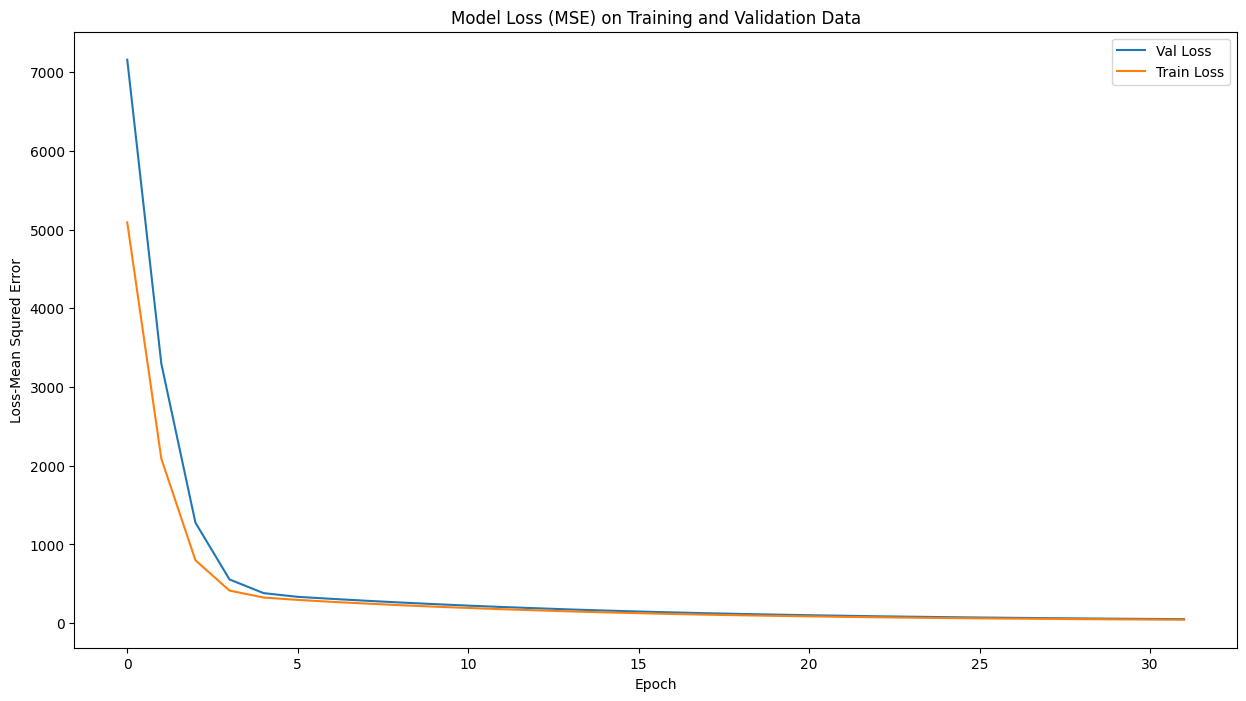

In [33]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()